In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import time

import requests
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
 url=("https://www.flipkart.com/search?q=%20laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off")

In [3]:
res=requests.get(url)
res

<Response [200]>

In [4]:
soup=BeautifulSoup(res.text)

In [5]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.c46047.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x

In [8]:
laptop=[]
price=[]
rating=[]
ssd=[]
feature=[]
processor=[]
ram=[]
opr_sys=[]
display=[]
pagenum=[]
for i in range(1,24):
    start_time = time.time()
    url=("https://www.flipkart.com/search?q=%20laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page{}".format(i))
    page=requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    
    for x in soup.find_all("div",attrs={"class":"_3pLy-c row"}):
        name = x.find("div",attrs={"class":"_4rR01T"})
        feat = x.find("div",attrs={"class":"fMghEO"})
        cost = x.find("div",attrs={"class":"_30jeq3 _1_WHN1"})
        rate = x.find("div",attrs={"class":"_3LWZlK"})
        pro = x.ul.find_all("li",class_="rgWa7D")
        
                
        if name is None:
            laptop.append(np.nan)
        else:
            laptop.append(name.text.split("-")[0])
            
        if cost is None:
            price.append(np.nan)
        else:
            price.append(cost.text.replace("₹","").replace(",",""))
        
        if rate is None:
            rating.append(np.nan)
        else:
            rating.append(rate.text)
            
        if feat is None:
            feature.append(np.nan)
        else:
            feature.append(feat.text)
            
        if pro is None:
            processor.append(np.nan)
        else:
            processor.append(pro[0].text)
            ram.append(pro[1].text.replace("RAM",""))
            opr_sys.append(pro[2].text.replace("Operating System",""))
            ssd.append(pro[3].text)
            display.append(pro[4].text.split()[0])
            
            pagenum.append(i)
    print("page {} completed in {} seconds".format(i,time.time()-start_time))

page 1 completed in 1.885446310043335 seconds
page 2 completed in 1.6354455947875977 seconds
page 3 completed in 1.7053289413452148 seconds
page 4 completed in 2.1976876258850098 seconds
page 5 completed in 1.5185790061950684 seconds
page 6 completed in 1.5509283542633057 seconds
page 7 completed in 1.731379747390747 seconds
page 8 completed in 1.5330603122711182 seconds
page 9 completed in 1.5360124111175537 seconds
page 10 completed in 1.8301351070404053 seconds
page 11 completed in 1.653341293334961 seconds
page 12 completed in 1.3318073749542236 seconds
page 13 completed in 1.3262715339660645 seconds
page 14 completed in 1.957326889038086 seconds
page 15 completed in 1.6175971031188965 seconds
page 16 completed in 1.5337567329406738 seconds
page 17 completed in 1.623530387878418 seconds
page 18 completed in 1.6113834381103516 seconds
page 19 completed in 1.599334478378296 seconds
page 20 completed in 1.5777690410614014 seconds
page 21 completed in 1.5945096015930176 seconds
page 22

In [9]:
len(laptop),len(price),len(rating),len(ssd),len(feature),len(processor),len(ram),len(opr_sys),len(display)


(552, 552, 552, 552, 552, 552, 552, 552, 552)

In [12]:
laptop_df=pd.DataFrame({"LAPTOP_NAME":laptop,
                        "PRICE":price,
                        "RATING":rating,
                        "FEATURE":feature,
                        "PROCESSOR":processor,
                        "RAM":ram,
                        "STORAGE":ssd,
                        "OPERATING_SYSTEM":opr_sys,
                        "DISPLAY_cm":display})
laptop_df.head()

,LAPTOP_NAME,PRICE,RATING,FEATURE,PROCESSOR,RAM,STORAGE,OPERATING_SYSTEM,DISPLAY_cm
0,Lenovo Ideapad Gaming 3 Core i5 11th Gen,65990,4.4,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i5 Processor (11th Gen),8 GB DDR4,1 TB HDD|256 GB SSD,64 bit Windows 11,39.62
1,Lenovo IdeaPad 5 Core i5 12th Gen,65300,NaN,Intel Core i5 Processor (12th Gen)16 GB DDR4 R...,Intel Core i5 Processor (12th Gen),16 GB DDR4,512 GB SSD,64 bit Windows 11,39.62
2,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,4.3,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor (10th Gen),8 GB DDR4,512 GB SSD,64 bit Windows 11,39.62
3,acer Aspire 3 Ryzen 3 Dual Core 3250U,26990,4.2,AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM64...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4,256 GB SSD,64 bit Windows 11,39.62
4,HP Celeron Dual Core,25990,4.4,Intel Celeron Dual Core Processor8 GB DDR4 RAM...,Intel Celeron Dual Core Processor,8 GB DDR4,256 GB SSD,64 bit Windows 11,35.56


In [13]:
laptop_df.to_csv("C:\\Users\\heena\\OneDrive\\Desktop\\laptop_data.csv",index=False)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import time

import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("C:\\Users\\heena\\OneDrive\\Desktop\\laptop_data.csv")
data.head()

,LAPTOP_NAME,PRICE,RATING,FEATURE,PROCESSOR,RAM,STORAGE,OPERATING_SYSTEM,DISPLAY_cm
0,Lenovo Ideapad Gaming 3 Core i5 11th Gen,65990,4.4,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i5 Processor (11th Gen),8 GB DDR4,1 TB HDD|256 GB SSD,64 bit Windows 11,39.62
1,Lenovo IdeaPad 5 Core i5 12th Gen,65300,NaN,Intel Core i5 Processor (12th Gen)16 GB DDR4 R...,Intel Core i5 Processor (12th Gen),16 GB DDR4,512 GB SSD,64 bit Windows 11,39.62
2,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,4.3,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor (10th Gen),8 GB DDR4,512 GB SSD,64 bit Windows 11,39.62
3,acer Aspire 3 Ryzen 3 Dual Core 3250U,26990,4.2,AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM64...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4,256 GB SSD,64 bit Windows 11,39.62
4,HP Celeron Dual Core,25990,4.4,Intel Celeron Dual Core Processor8 GB DDR4 RAM...,Intel Celeron Dual Core Processor,8 GB DDR4,256 GB SSD,64 bit Windows 11,35.56


In [4]:
data.shape

(552, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LAPTOP_NAME       552 non-null    object 
 1   PRICE             552 non-null    int64  
 2   RATING            467 non-null    float64
 3   FEATURE           552 non-null    object 
 4   PROCESSOR         552 non-null    object 
 5   RAM               552 non-null    object 
 6   STORAGE           552 non-null    object 
 7   OPERATING_SYSTEM  552 non-null    object 
 8   DISPLAY_cm        552 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 38.9+ KB


In [6]:
data.isnull().sum()

LAPTOP_NAME          0
PRICE                0
RATING              85
FEATURE              0
PROCESSOR            0
RAM                  0
STORAGE              0
OPERATING_SYSTEM     0
DISPLAY_cm           0
dtype: int64

In [7]:
data["RATING"].isnull().sum()/data.shape[0]*100

15.39855072463768

In [8]:
data[data["RATING"].isnull()]

,LAPTOP_NAME,PRICE,RATING,FEATURE,PROCESSOR,RAM,STORAGE,OPERATING_SYSTEM,DISPLAY_cm
1,Lenovo IdeaPad 5 Core i5 12th Gen,65300,NaN,Intel Core i5 Processor (12th Gen)16 GB DDR4 R...,Intel Core i5 Processor (12th Gen),16 GB DDR4,512 GB SSD,64 bit Windows 11,39.62
11,HP Spectre Intel Evo Core i7 12th Gen,131999,NaN,Intel Core i7 Processor (12th Gen)16 GB LPDDR4...,Intel Core i7 Processor (12th Gen),16 GB LPDDR4X,512 GB SSD,64 bit Windows 11,40.64
15,HP Envy 13 Intel Evo Core i7 12th Gen,101990,NaN,Intel Core i7 Processor (12th Gen)16 GB LPDDR4...,Intel Core i7 Processor (12th Gen),16 GB LPDDR4X,512 GB SSD,Windows 11,33.78
25,Lenovo IdeaPad 5 Core i5 12th Gen,65300,NaN,Intel Core i5 Processor (12th Gen)16 GB DDR4 R...,Intel Core i5 Processor (12th Gen),16 GB DDR4,512 GB SSD,64 bit Windows 11,39.62
34,HP Spectre Intel Evo Core i7 12th Gen,131999,NaN,Intel Core i7 Processor (12th Gen)16 GB LPDDR4...,Intel Core i7 Processor (12th Gen),16 GB LPDDR4X,512 GB SSD,64 bit Windows 11,40.64
...,...,...,...,...,...,...,...,...,...
525,HP Envy 13 Intel Evo Core i7 12th Gen,109999,NaN,Intel Core i7 Processor (12th Gen)16 GB LPDDR4...,Intel Core i7 Processor (12th Gen),16 GB LPDDR4X,1 TB SSD,Windows 11,33.78
529,Lenovo IdeaPad 5 Core i5 12th Gen,65300,NaN,Intel Core i5 Processor (12th Gen)16 GB DDR4 R...,Intel Core i5 Processor (12th Gen),16 GB DDR4,512 GB SSD,64 bit Windows 11,39.62
538,HP Spectre Intel Evo Core i7 12th Gen,131999,NaN,Intel Core i7 Processor (12th Gen)16 GB LPDDR4...,Intel Core i7 Processor (12th Gen),16 GB LPDDR4X,512 GB SSD,64 bit Windows 11,40.64
539,HP Envy 13 Intel Evo Core i7 12th Gen,101990,NaN,Intel Core i7 Processor (12th Gen)16 GB LPDDR4...,Intel Core i7 Processor (12th Gen),16 GB LPDDR4X,512 GB SSD,Windows 11,33.78


In [9]:
round(data["RATING"].mean(),1)

4.3

In [10]:
data.RATING.median()

4.3

In [11]:
data.describe()

,PRICE,RATING
count,552.000000,467.000000
mean,63218.047101,4.283940
std,31479.731575,0.341951
min,23990.000000,3.000000
25%,39931.000000,4.200000
50%,49990.000000,4.300000
75%,86990.000000,4.400000
max,131999.000000,4.800000


In [12]:
data["RATING"].fillna(data["RATING"].median(),inplace=True)

In [13]:
data

,LAPTOP_NAME,PRICE,RATING,FEATURE,PROCESSOR,RAM,STORAGE,OPERATING_SYSTEM,DISPLAY_cm
0,Lenovo Ideapad Gaming 3 Core i5 11th Gen,65990,4.4,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i5 Processor (11th Gen),8 GB DDR4,1 TB HDD|256 GB SSD,64 bit Windows 11,39.62
1,Lenovo IdeaPad 5 Core i5 12th Gen,65300,4.3,Intel Core i5 Processor (12th Gen)16 GB DDR4 R...,Intel Core i5 Processor (12th Gen),16 GB DDR4,512 GB SSD,64 bit Windows 11,39.62
2,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,4.3,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor (10th Gen),8 GB DDR4,512 GB SSD,64 bit Windows 11,39.62
3,acer Aspire 3 Ryzen 3 Dual Core 3250U,26990,4.2,AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM64...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4,256 GB SSD,64 bit Windows 11,39.62
4,HP Celeron Dual Core,25990,4.4,Intel Celeron Dual Core Processor8 GB DDR4 RAM...,Intel Celeron Dual Core Processor,8 GB DDR4,256 GB SSD,64 bit Windows 11,35.56
...,...,...,...,...,...,...,...,...,...
547,Lenovo IdeaPad 3 Core i3 11th Gen,38700,4.2,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor (11th Gen),8 GB DDR4,512 GB SSD,64 bit Windows 11,39.62
548,HP 15s Intel Core i3 11th Gen,40650,4.2,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor (11th Gen),8 GB DDR4,512 GB SSD,64 bit Windows 11,39.62
549,HP Envy 13 Intel Evo Core i7 12th Gen,109999,4.3,Intel Core i7 Processor (12th Gen)16 GB LPDDR4...,Intel Core i7 Processor (12th Gen),16 GB LPDDR4X,1 TB SSD,Windows 11,33.78
550,Infinix X1 Slim Series Core i3 10th Gen,29990,4.2,Intel Core i3 Processor (10th Gen)8 GB LPDDR4X...,Intel Core i3 Processor (10th Gen),8 GB LPDDR4X,256 GB SSD,64 bit Windows 11,35.56


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LAPTOP_NAME       552 non-null    object 
 1   PRICE             552 non-null    int64  
 2   RATING            552 non-null    float64
 3   FEATURE           552 non-null    object 
 4   PROCESSOR         552 non-null    object 
 5   RAM               552 non-null    object 
 6   STORAGE           552 non-null    object 
 7   OPERATING_SYSTEM  552 non-null    object 
 8   DISPLAY_cm        552 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 38.9+ KB


DATA ANALYSING AND VISUALISATION

<function matplotlib.pyplot.show(close=None, block=None)>

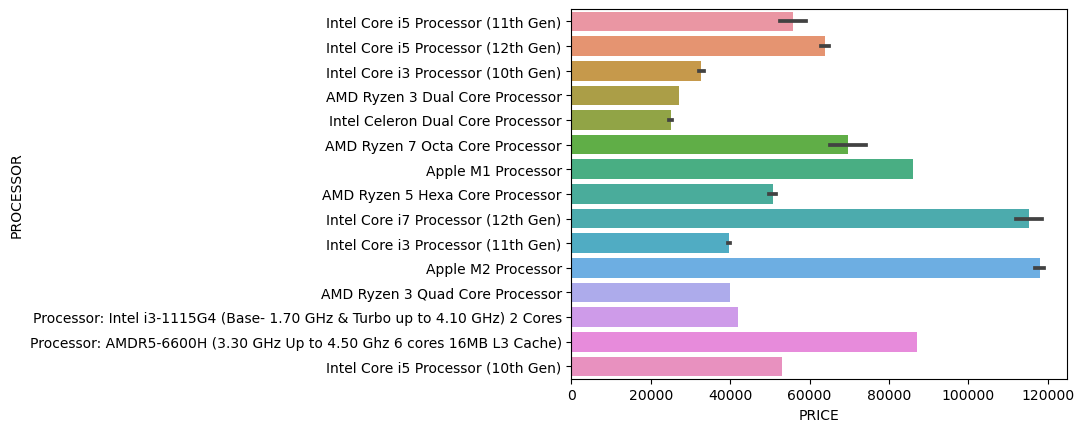

In [15]:

sns.barplot(data=data,y="PROCESSOR",x="PRICE")
plt.show

in the above plot "M2 Apple processor" is having maximum price 
"intel i7 proceesor" and "M2 Apple processor" is having price ranging around 10000 to 120000 
min price is around 25000 of intel dual core processor

<AxesSubplot:xlabel='STORAGE', ylabel='PRICE'>

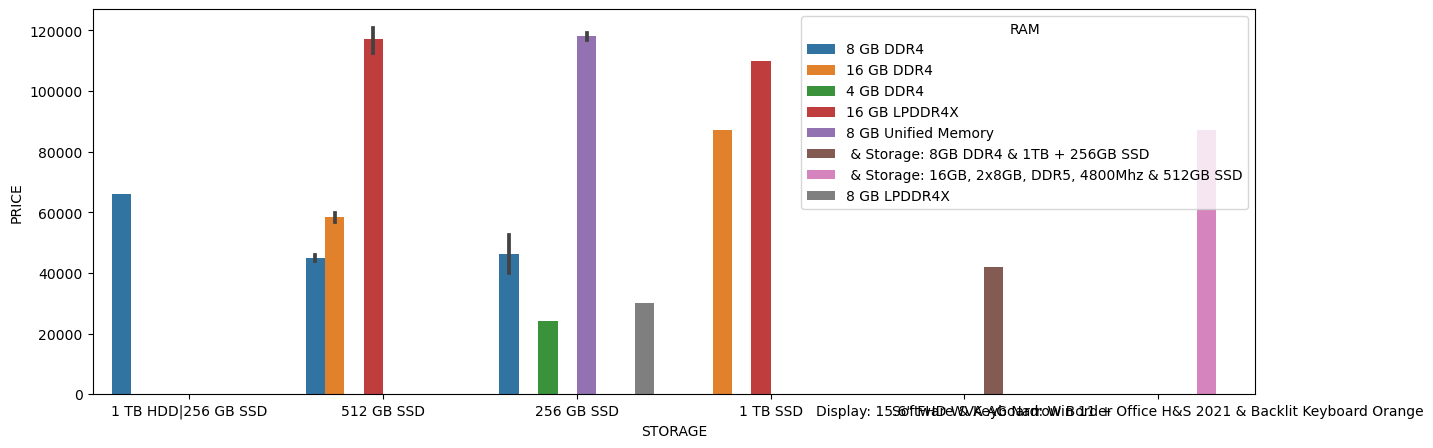

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x="STORAGE",y="PRICE",hue="RAM")


storage of 512SSD and ram od 16gb laptop is very high around maximum
as storage is less price is also less
storage and price is directly proportional

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,y="PRICE",x="RATING",hue="STORAGE")

laptops having storage of 512gb ssd have rating of 4.3 which means that people prefer to buy these storage of laptops, and 
also not having any exterme values,these laptops have very good sale as u can see the iqr is also high
other ratinngs hardly effective to the sale revenue

<AxesSubplot:xlabel='STORAGE', ylabel='PRICE'>

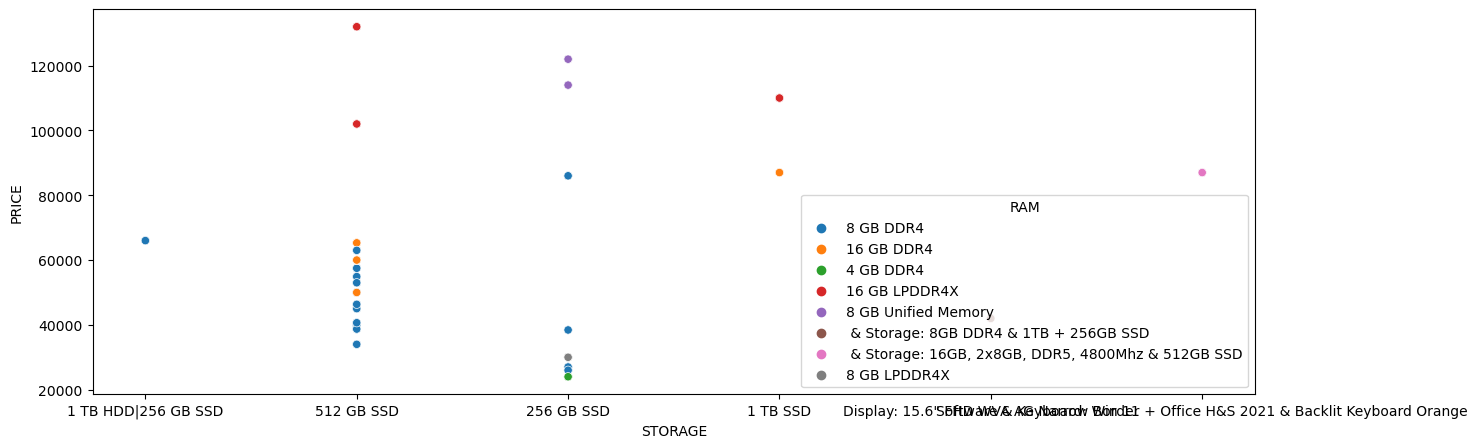

In [189]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x="STORAGE",y="PRICE",hue="RAM")